In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing train and text data
df_train=pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Data_Test.xlsx')

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.shape

(10683, 11)

In [5]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df_train.dropna(inplace=True)

In [8]:
df_train.Total_Stops.dtype

dtype('O')

In [9]:
df_train["Airline"].value_counts().reset_index()

,index,Airline
0,Jet Airways,3849
1,IndiGo,2053
2,Air India,1751
3,Multiple carriers,1196
4,SpiceJet,818
5,Vistara,479
6,Air Asia,319
7,GoAir,194
8,Multiple carriers Premium economy,13
9,Jet Airways Business,6


In [10]:
#Airline column is nominal categorical data and there is less cardinality, so we will perform One Hot Encoding.
Airline=df_train["Airline"]
Airline=pd.get_dummies(Airline,drop_first=True)

In [11]:
Airline.shape

(10682, 11)

In [12]:
Airline.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy'],
      dtype='object')

In [13]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [14]:
#Dealing with the datetime format
df_train["day_of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"], format="%d/%m/%Y").dt.day
df_train["month_of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"], format="%d/%m/%Y").dt.month

df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [15]:
#Dealing with the departure hour-min format
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

df_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [16]:
#Dealing with the departure hour-min format
df_train["Arrival_hour"] = pd.to_datetime(df_train["Arrival_Time"]).dt.hour
df_train["Arrival_min"] = pd.to_datetime(df_train["Arrival_Time"]).dt.minute

df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [17]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
# Assigning and converting Duration column into list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:  
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" 
        else:
            duration[i] = "0h " + duration[i]        

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [19]:
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

df_train.drop(["Duration"], axis = 1, inplace = True)

In [20]:
df_train.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [21]:
#As Source is Nominal Categorical data and cardinality is less so we will perform OneHotEncoding.
Source=df_train[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)

In [22]:
#Destination is Nominal Categorical data and cardinality is less so we will perform OneHotEncoding.
Destination=df_train[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)

In [23]:
#Additional_Info contains almost 80% no_info ,also Route and Total_Stops are related to each other. so we will drop both the column.
df_train.drop(["Route",
               "Additional_Info",
               "Airline",
               "Source",
               "Destination"],axis=1,inplace=True)

In [24]:
df_train

,Total_Stops,Price,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,non-stop,3897,24,3,22,20,1,10,2,50
1,2 stops,7662,1,5,5,50,13,15,7,25
2,2 stops,13882,9,6,9,25,4,25,19,0
3,1 stop,6218,12,5,18,5,23,30,5,25
4,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...
10678,non-stop,4107,9,4,19,55,22,25,2,30
10679,non-stop,4145,27,4,20,45,23,20,2,35
10680,non-stop,7229,27,4,8,20,11,20,3,0
10681,non-stop,12648,1,3,11,30,14,10,2,40


In [25]:
#In this is case of Ordinal Categorical type we perform Label Encoder.Values are assigned with corresponding keys.
df_train["Total_Stops"].value_counts().reset_index()

,index,Total_Stops
0,1 stop,5625
1,non-stop,3491
2,2 stops,1520
3,3 stops,45
4,4 stops,1


In [26]:
df_train.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [27]:
df_final_train=pd.concat([df_train,Airline,Source,Destination],axis=1)

In [28]:
df_final_train.head()

,Total_Stops,Price,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


### Test Data

In [29]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [31]:
df_test.shape

(2671, 10)

In [32]:
#Airline column is nominal categorical data and there is less cardinality, so we will perform One Hot Encoding.
Airline=df_test["Airline"]
Airline=pd.get_dummies(Airline,drop_first=True)

In [33]:
#Dealing with the datetime format
df_test["day_of_Journey"] = pd.to_datetime(df_test["Date_of_Journey"], format="%d/%m/%Y").dt.day
df_test["month_of_Journey"] = pd.to_datetime(df_test["Date_of_Journey"], format="%d/%m/%Y").dt.month

df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [34]:
#Dealing with the departure hour-min format
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

df_test.drop(["Dep_Time"], axis = 1, inplace = True)

In [35]:
#Dealing with the departure hour-min format
df_test["Arrival_hour"] = pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test["Arrival_Time"]).dt.minute

df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [36]:
# Assigning and converting Duration column into list
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:  
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" 
        else:
            duration[i] = "0h " + duration[i]        

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [37]:
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins

df_test.drop(["Duration"], axis = 1, inplace = True)

In [38]:
#As Source is Nominal Categorical data and cardinality is less so we will perform OneHotEncoding.
Source=df_test[["Source"]]
Source = pd.get_dummies(df_test["Source"], drop_first= True)

In [39]:
#Destination is Nominal Categorical data and cardinality is less so we will perform OneHotEncoding.
Destination=df_test[["Destination"]]
Destination=pd.get_dummies(df_test["Destination"],drop_first=True)

In [40]:
#Additional_Info contains almost 80% no_info ,also Route and Total_Stops are related to each other. so we will drop both the column.
df_test.drop(["Route",
               "Additional_Info",
               "Airline",
               "Source",
               "Destination"],axis=1,inplace=True)

In [41]:
#In this is case of Ordinal Categorical type we perform Label Encoder.Values are assigned with corresponding keys.
df_test["Total_Stops"].value_counts().reset_index()

,index,Total_Stops
0,1 stop,1431
1,non-stop,849
2,2 stops,379
3,3 stops,11
4,4 stops,1


In [42]:
df_test.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [43]:
df_final_test=pd.concat([df_test,Airline,Source,Destination],axis=1)

In [44]:
df_final_test.head(5)

,Total_Stops,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
df_final_train.describe()

,Total_Stops,Price,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624,...,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817,...,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df_final_train.columns

Index(['Total_Stops', 'Price', 'day_of_Journey', 'month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [47]:
X = df_final_train.loc[:, ['Total_Stops', 'day_of_Journey', 'month_of_Journey', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business',
       'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
y=df_final_train.iloc[:,1]

In [49]:
X.drop(["Trujet"],inplace=True,axis=1)

In [50]:
X.shape, y.shape

((10682, 28), (10682,))

<AxesSubplot:>

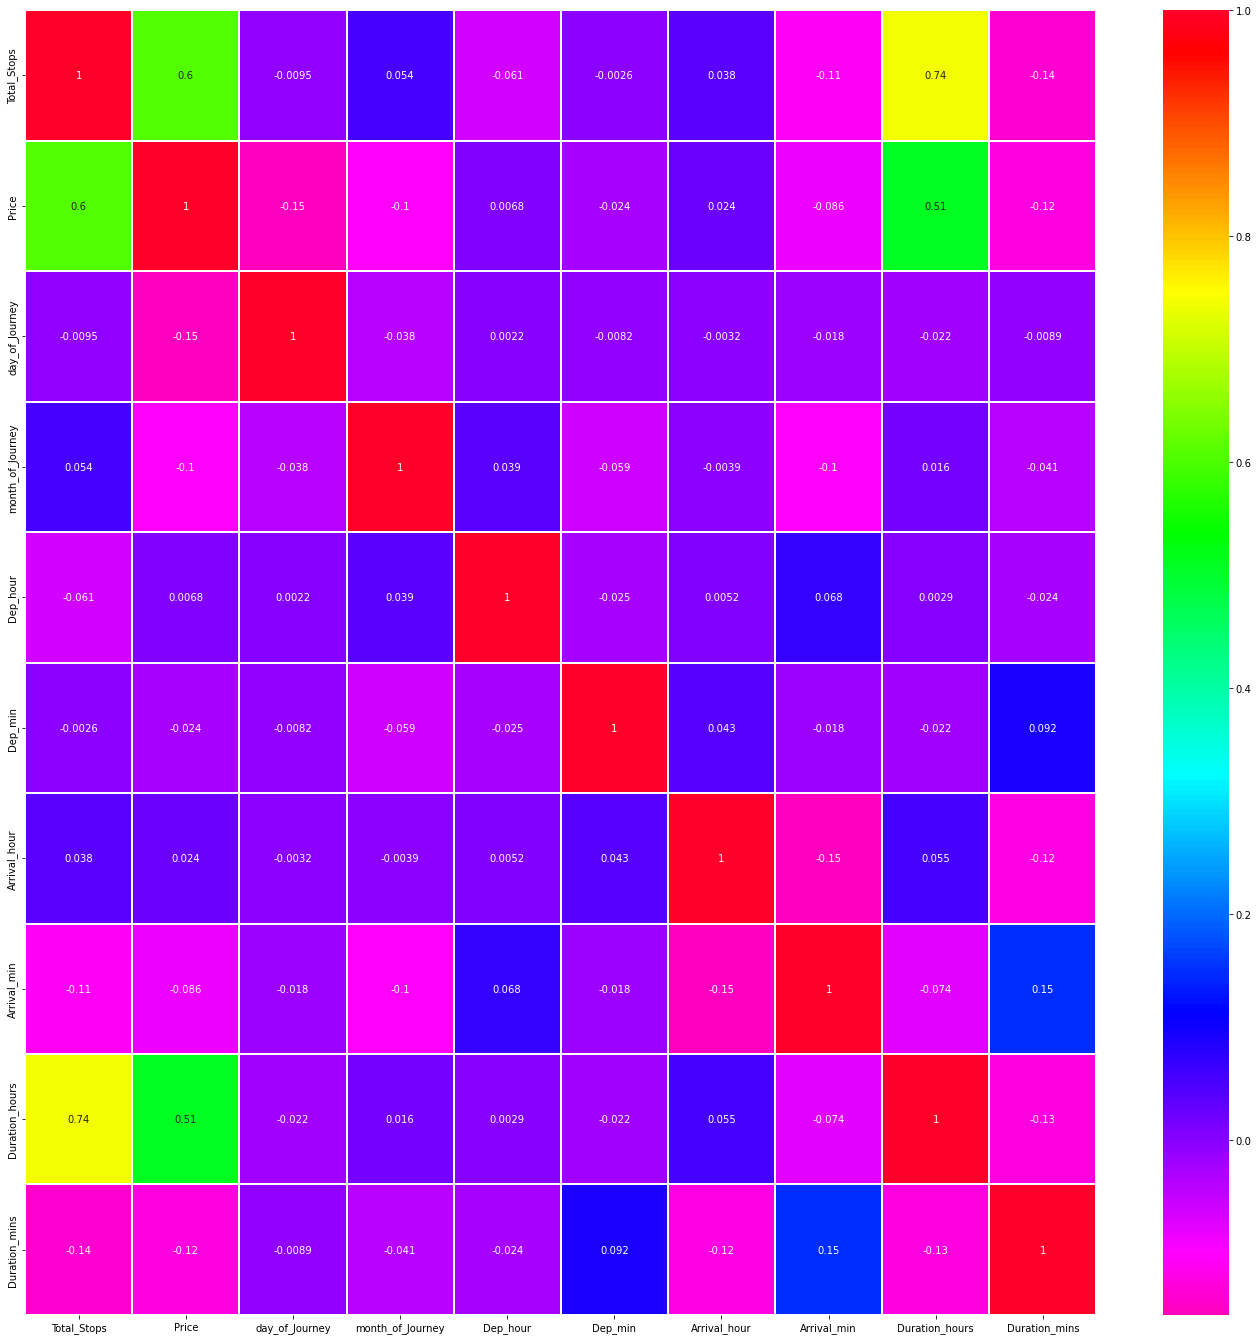

In [51]:
plt.figure(figsize=(24,24))

sns.heatmap(df_train.corr(),cmap="gist_rainbow_r",annot=True,linewidths=2)

### Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [53]:
#https://medium.com/geekculture/flight-fare-prediction-93da3958eb95

### Random forest Regressor

In [54]:
#Random forest Regressor
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X,y)

RandomForestRegressor()

In [55]:
y_pred=regressor.predict(X_test)

In [56]:
regressor.score(X_train,y_train)

0.9500004918134292

Text(0, 0.5, 'y_pred')

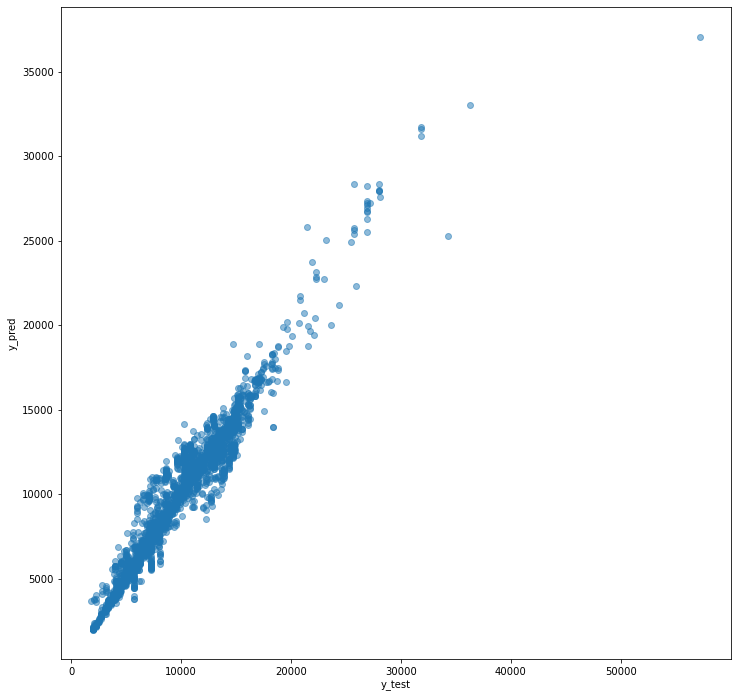

In [57]:
plt.figure(figsize=(12,12))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

### RMSE, MSE AND MAE

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MAE =",mean_absolute_error(y_test,y_pred))
print("MSE =",mean_squared_error(y_test,y_pred))
print("RMSE =",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE = 589.6992184325815
MSE = 1088983.3735229091
RMSE = 1043.5436615316626


In [59]:
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [70]:
import pickle

pickle.dump(regressor,open('flight_reg.pkl','wb'))
pickled_model=pickle.load(open('flight_reg.pkl','rb'))
y_predict=pickled_model.predict(X_test)

from sklearn import metrics
metrics.r2_score(y_test, y_predict)

0.9466208865911683